# Lab 3 Churn Analysis
## Import CSV

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings as wr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, accuracy_score, recall_score 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
data=pd.read_csv('telecom_customer_data.csv')


## Data Exploration

In [4]:
print(data.head())


   CustomerID  Gender  Age  Tenure     ServiceType  MonthlyCharges  \
0           1    Male   49      54        Internet           99.51   
1           2  Female   56       8        Internet           35.17   
2           3    Male   66      27           Phone           68.77   
3           4    Male   69      27  Phone+Internet           97.85   
4           5    Male   49      34        Internet           66.62   

   TotalCharges Churn  
0       7860.79    No  
1        985.11    No  
2       3243.06    No  
3       7758.82   Yes  
4       6937.51   Yes  


In [5]:
print(data.describe())

       CustomerID         Age      Tenure  MonthlyCharges  TotalCharges
count  200.000000  200.000000  200.000000      200.000000    200.000000
mean   100.500000   44.405000   31.925000       64.151600   4067.723450
std     57.879185   15.353816   16.390933       20.314982   2247.282613
min      1.000000   18.000000    1.000000       31.020000    136.590000
25%     50.750000   32.750000   21.000000       46.457500   2082.672500
50%    100.500000   46.000000   32.000000       63.550000   4069.415000
75%    150.250000   56.000000   46.250000       80.147500   6010.755000
max    200.000000   69.000000   58.000000       99.980000   7975.310000


In [6]:
mean_Age = data['Age'].mean()
mean_Tenure = data['Tenure'].mean()
mean_MonthlyCharges = data['MonthlyCharges'].mean()
mean_TotalCharges = data['TotalCharges'].mean()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   ServiceType     200 non-null    object 
 5   MonthlyCharges  200 non-null    float64
 6   TotalCharges    200 non-null    float64
 7   Churn           200 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 12.6+ KB


In [8]:
data.columns.tolist()

['CustomerID',
 'Gender',
 'Age',
 'Tenure',
 'ServiceType',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
ServiceType       0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [10]:
data.nunique()

CustomerID        200
Gender              2
Age                50
Tenure             55
ServiceType         3
MonthlyCharges    200
TotalCharges      200
Churn               2
dtype: int64

In [11]:
count = data['Churn'].value_counts()['Yes']  # Count occurrences of 1
print(count)

99


## Plots

### Histogram of numerical columns

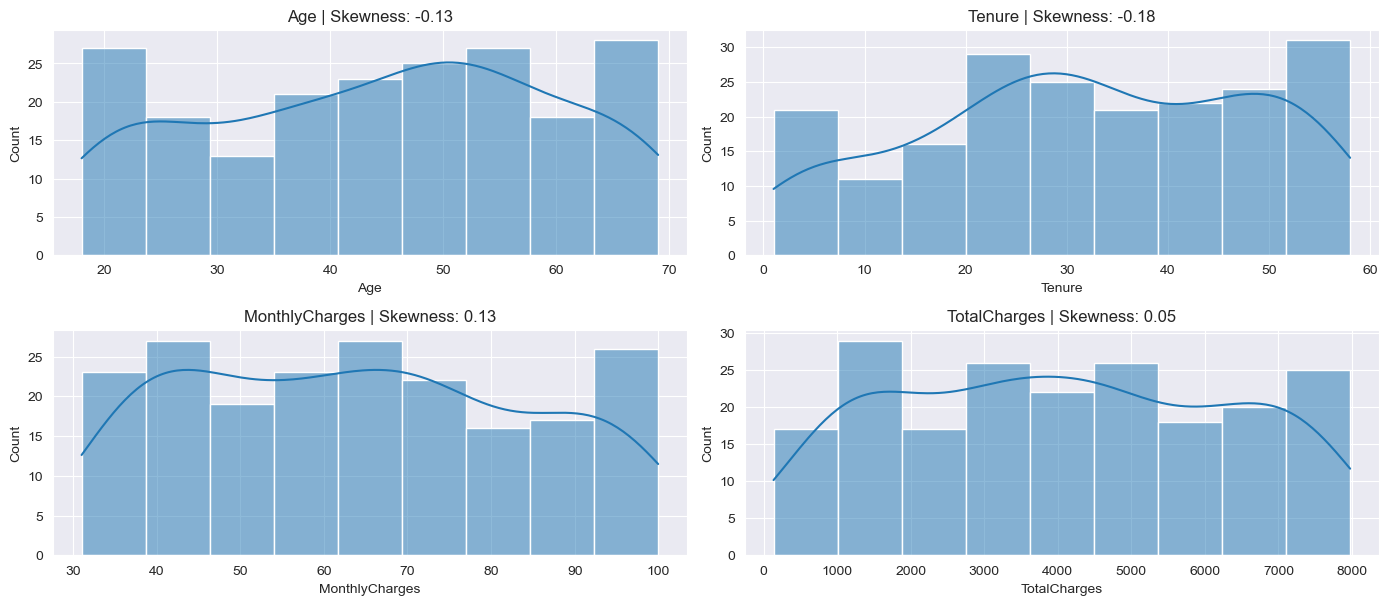

In [14]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data[['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']]

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, Age in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[Age], kde=True)
    plt.title(f"{Age} | Skewness: {round(data[Age].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Swarm Plot

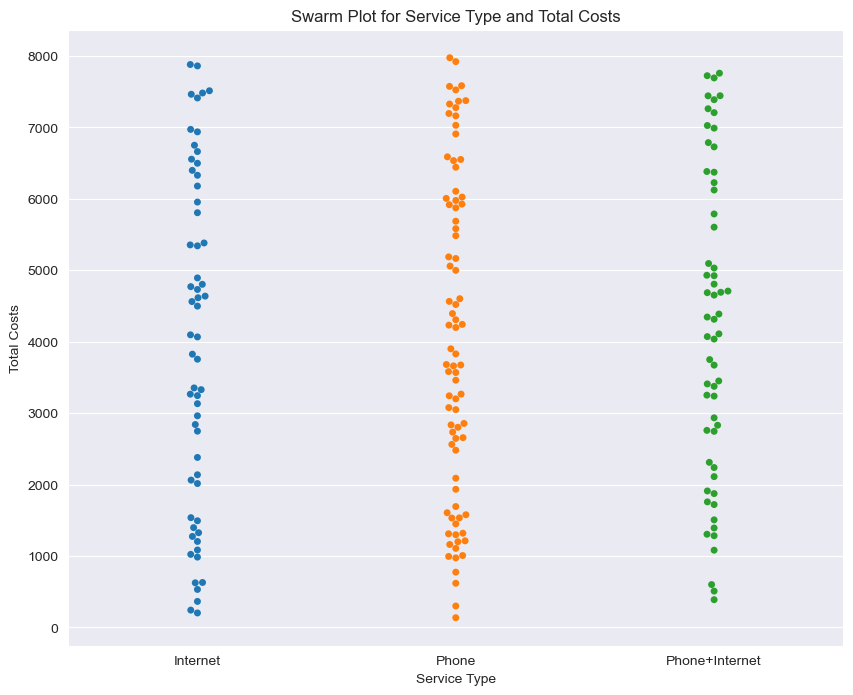

In [16]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="ServiceType", y="TotalCharges", data=data, hue="ServiceType", legend=False)

plt.title('Swarm Plot for Service Type and Total Costs')
plt.xlabel('Service Type')
plt.ylabel('Total Costs')
plt.show()

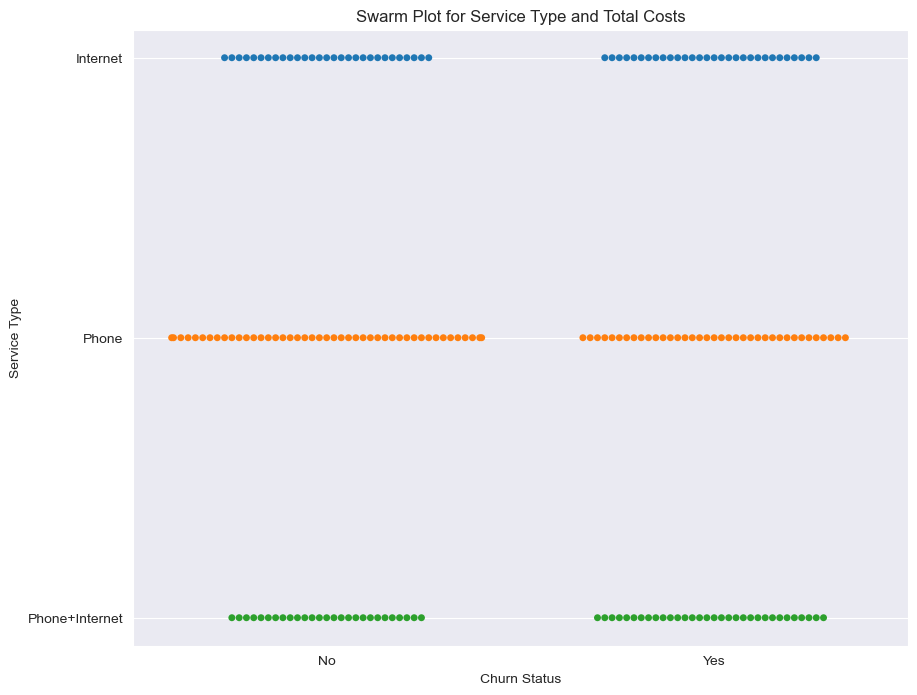

In [17]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="Churn", y="ServiceType", data=data, hue="ServiceType", legend=False)

plt.title('Swarm Plot for Service Type and Total Costs')
plt.xlabel('Churn Status')
plt.ylabel('Service Type')
plt.show()

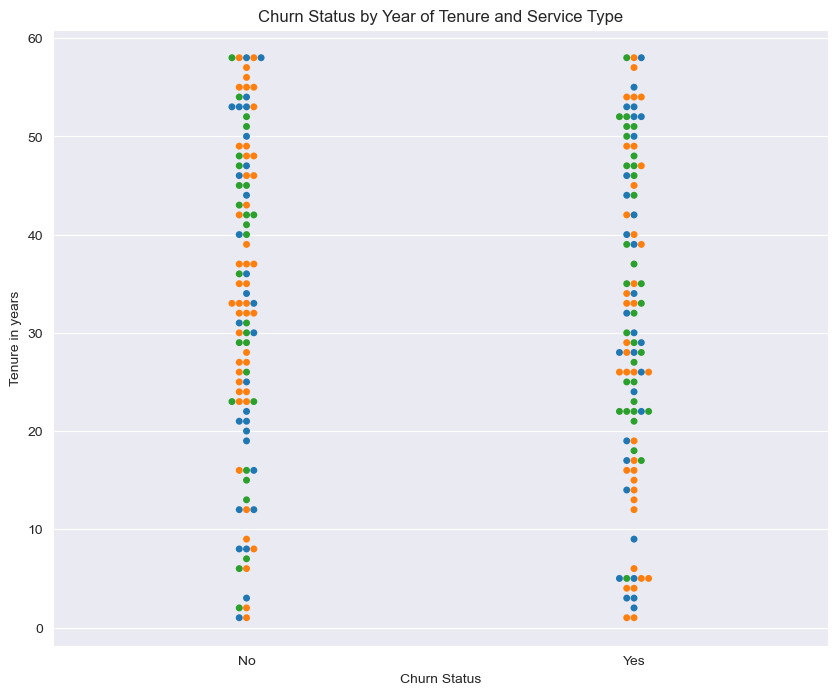

In [18]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="Churn", y="Tenure", data=data, hue="ServiceType", legend=False)

plt.title('Churn Status by Year of Tenure and Service Type')
plt.xlabel('Churn Status')
plt.ylabel('Tenure in years')
plt.show()

### Box Plot

<Axes: xlabel='ServiceType', ylabel='TotalCharges'>

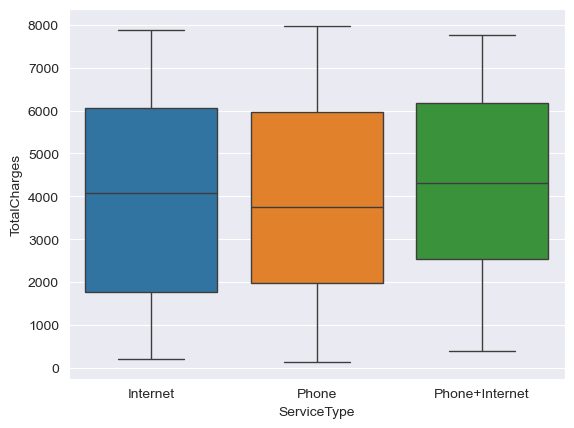

In [20]:
#plotting box plot between alcohol and quality
sns.boxplot(x='ServiceType', y='TotalCharges', data=data, hue="ServiceType")

### Individual Histograms

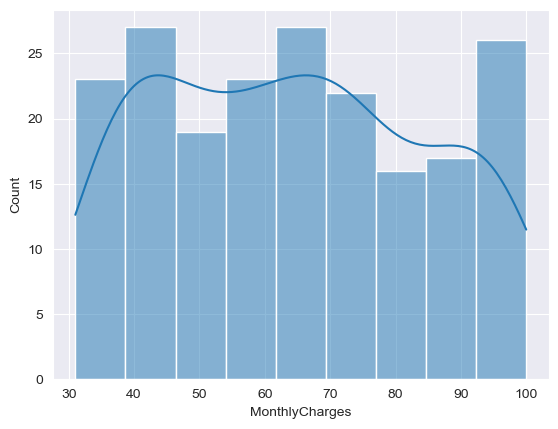

In [22]:
# Plot the distribution
sns.histplot(data['MonthlyCharges'], kde=True)
plt.show()

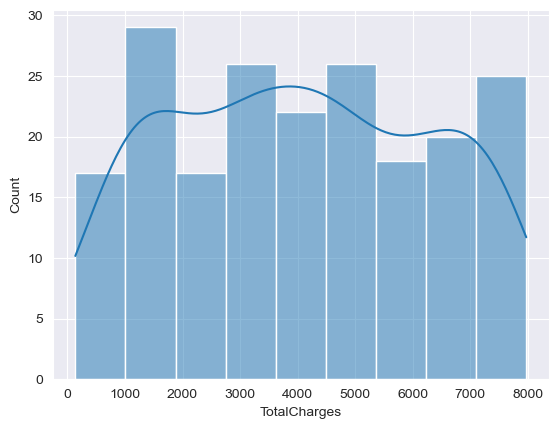

In [23]:
# Plot the distribution
sns.histplot(data['TotalCharges'], kde=True)
plt.show()

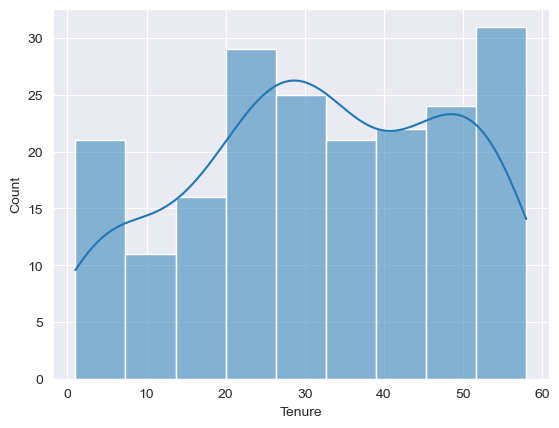

In [24]:
# Plot the distribution
sns.histplot(data['Tenure'], kde=True)
plt.show()

### Histogram Sorted by Years of Tenure

In [26]:
# Method: Using .loc 
# Create Tenure groups
data.loc[data['Tenure'] < 10, 'Tenure Group'] = 'Less than 10 years'
data.loc[(data['Tenure'] >= 10) & (data['Tenure'] < 20), 'Tenure Group'] = 'Between 10 and 20 years'
data.loc[(data['Tenure'] >= 20) & (data['Tenure'] < 30), 'Tenure Group'] = 'Between 20 and 30 years'
data.loc[(data['Tenure'] >= 30) & (data['Tenure'] < 40), 'Tenure Group'] = 'Bewteen 30 and 40 years'
data.loc[(data['Tenure'] >= 40) & (data['Tenure'] < 50), 'Tenure Group'] = 'Between 40 and 50 years'
data.loc[data['Tenure'] >= 50, 'Tenure Group'] = 'Greater than 50 years'

# Group by the new 'Tenure Group' column
grouped = data.groupby('Tenure Group')

# Print the groups
# for name, group in grouped:
#     print(name)
#     print(group)

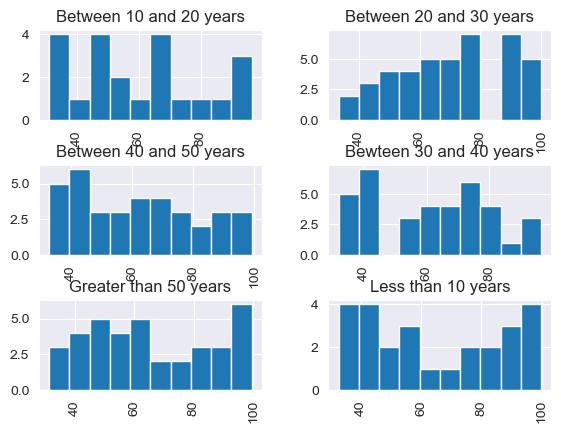

In [27]:
# Create a histogram grouped by 'Tenure'
data.hist(column='MonthlyCharges', by='Tenure Group')
plt.show()

### Density Plots

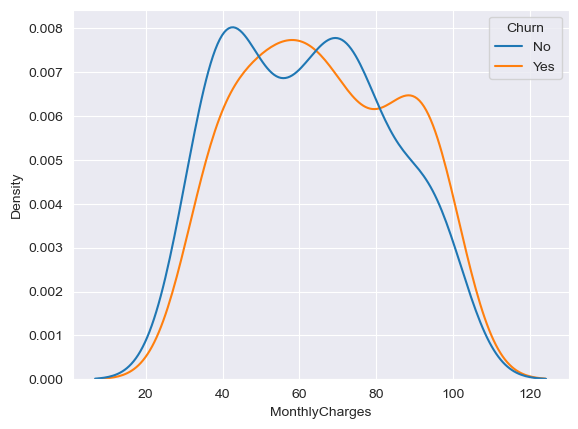

In [29]:
# Create a density plot
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn")
plt.show()

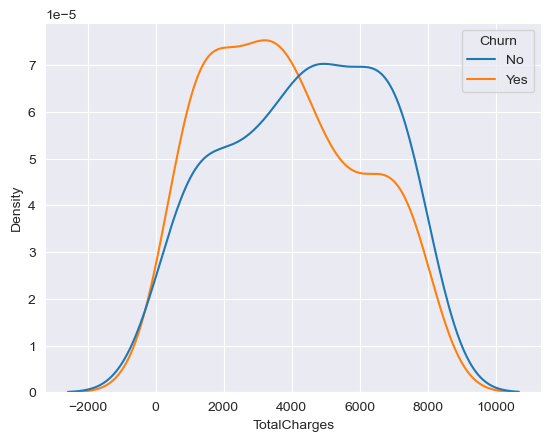

In [30]:
# Create a density plot
sns.kdeplot(data=data, x="TotalCharges", hue="Churn")
plt.show()

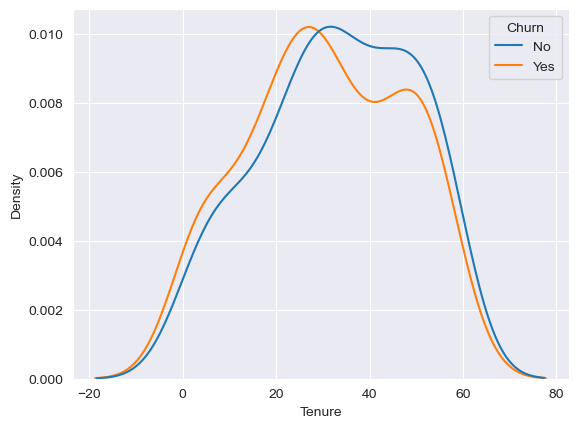

In [31]:
# Create a density plot
sns.kdeplot(data=data, x="Tenure", hue="Churn")
plt.show()

## Predictive Models

### Tenure v.s. All Columns

In [34]:
# Separate features and target variable
X = data.drop("Tenure", axis=1)  
y = data["Tenure"] 

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]).toarray(), 
                         columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns
X = X.drop(categorical_cols, axis=1) 

# Concatenate encoded categorical features with numerical features 
X = pd.concat([X, X_encoded], axis=1)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# print(X_scaled) # print normalized numerical values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train your predictive model (example using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train) 

# Make predictions on the test set
y_pred = model.predict(X_test) 
rounded_y_pred = np.round(y_pred, 4) # rounding a vector
# print(rounded_y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred) 
print("Mean Squared Error:", round(mse, 4))

Accuracy: 0.1
Mean Squared Error: 16.65


### Decision Tree: Churn v.s. Numerical Columns 

In [36]:
# Define your features (X) and target variable (y)
X = data[['MonthlyCharges', 'TotalCharges', 'Tenure', 'Age']]
y = data['Churn']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# print(X_scaled) # print normalized numerical values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.425


### Logistic Regression: Churn v.s. Numerical Columns

In [38]:
# Define your features (X) and target variable (y)
X = data[['MonthlyCharges', 'TotalCharges', 'Tenure', 'Age']]
y = data['Churn']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# print(X_scaled) # print normalized numerical values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Gender'])
y = data['Churn']

# Train the model
model = MultinomialNB()
model.fit(X, y)

# Predict the probability of a specific string value
new_text = ['Yes']
new_X = vectorizer.transform(new_text)
probabilities = model.predict_proba(new_X)

print('Probabilitity of Churn being a "Yes":', probabilities[:, 1])

Accuracy: 0.55
Probabilitity of Churn being a "Yes": [0.495]


## Correlations

In [40]:
# Label Encoding
data['Churn_encoded'] = data['Churn'].astype('category').cat.codes
data['Gender_encoded'] = data['Gender'].astype('category').cat.codes
data['Service_encoded'] = data['ServiceType'].astype('category').cat.codes

# Correlation
correlation = data['Churn_encoded'].corr(data['MonthlyCharges'])
correlation1 = data['Churn_encoded'].corr(data['TotalCharges'])
correlation2 = data['Churn_encoded'].corr(data['Tenure'])
correlation3 = data['Churn_encoded'].corr(data['Gender_encoded'])
correlation4 = data['Churn_encoded'].corr(data['Age'])
print(correlation, correlation1, correlation2, correlation3, correlation4)

0.09053967193830777 -0.1300435543296916 -0.0743619509807811 -0.07000350026252188 0.11681976143937466


### Churn v.s. Gender

In [42]:
corr, p_value = pearsonr(data['Gender_encoded'], data['Churn_encoded'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: -0.07000350026252193
P-value: 0.3246227900398214


### Churn v.s. Monthly Charges

In [44]:
corr, p_value = pearsonr(data['MonthlyCharges'], data['Churn_encoded'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: 0.09053967193830786
P-value: 0.20230255571092906


### Churn v.s. Total Charges

In [46]:
corr, p_value = pearsonr(data['TotalCharges'], data['Churn_encoded'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: -0.1300435543296917
P-value: 0.06645124586705789


### Churn v.s. Tenure

In [48]:
corr, p_value = pearsonr(data['Tenure'], data['Churn_encoded'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: -0.07436195098078122
P-value: 0.2953326799312304


### Churn v.s. Age

In [50]:
corr, p_value = pearsonr(data['Age'], data['Churn_encoded'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: 0.11681976143937478
P-value: 0.09948184562119076


## Heatmaps & Matrix

### Churn v.s. Gender

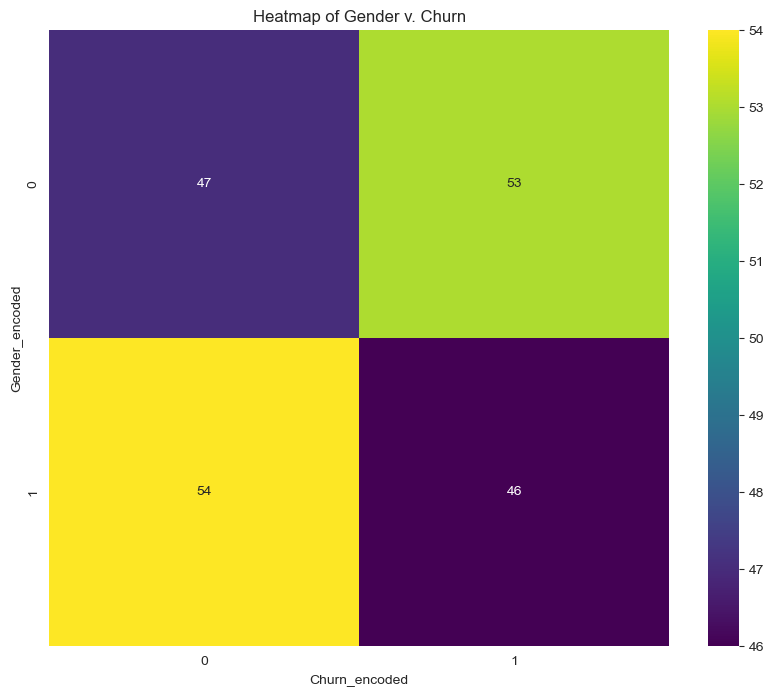

In [53]:
data_pivot = data.pivot_table(index='Gender_encoded',
                                  columns = 'Churn_encoded', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Gender v. Churn')
plt.show()

### Churn v.s. Age

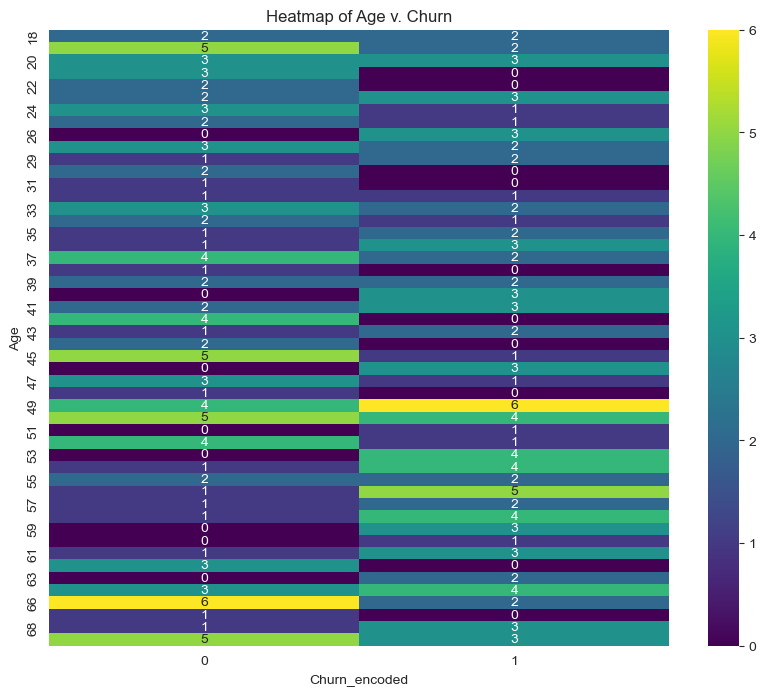

In [55]:
data_pivot = data.pivot_table(index='Age',
                                  columns = 'Churn_encoded', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Age v. Churn')
plt.show()

### Churn v.s. Monthly Charges

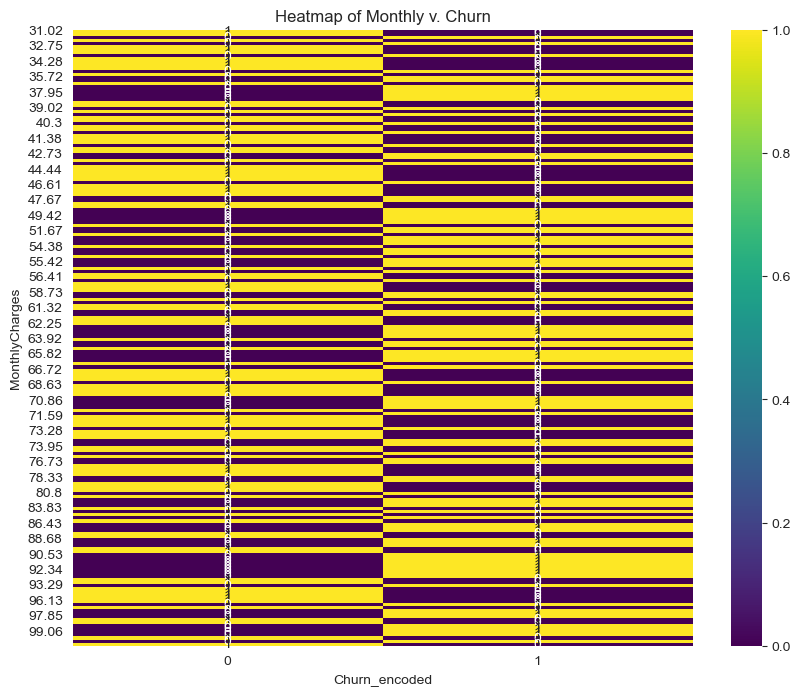

In [57]:
data_pivot = data.pivot_table(index='MonthlyCharges',
                                  columns = 'Churn_encoded', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Monthly v. Churn')
plt.show()

### Churn v.s. Total Charges

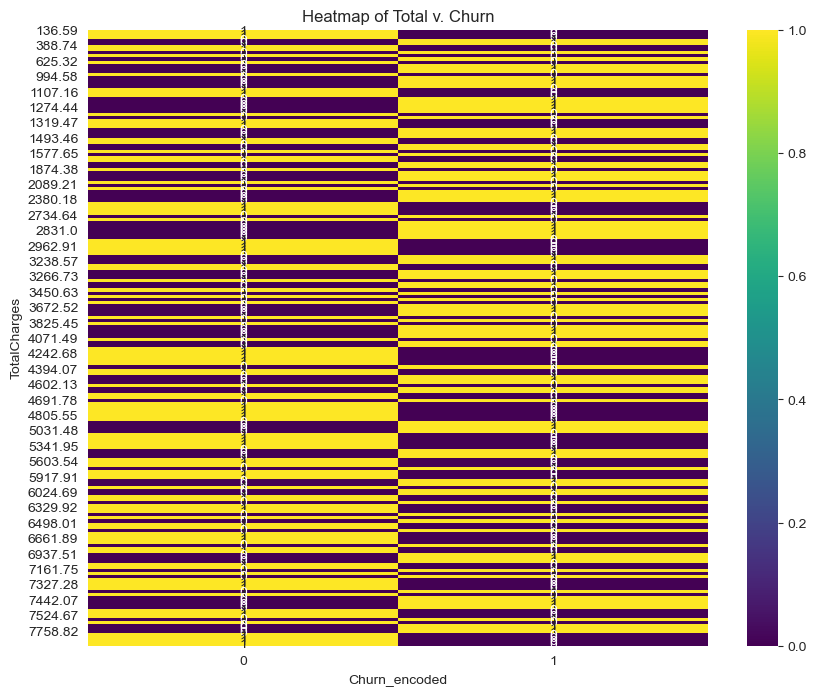

In [59]:
data_pivot = data.pivot_table(index='TotalCharges',
                                  columns = 'Churn_encoded', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Total v. Churn')
plt.show()

### Corr Matrix

                 Churn_encoded  MonthlyCharges  TotalCharges    Tenure  \
Churn_encoded         1.000000        0.090540     -0.130044 -0.074362   
MonthlyCharges        0.090540        1.000000     -0.036275 -0.034594   
TotalCharges         -0.130044       -0.036275      1.000000 -0.070595   
Tenure               -0.074362       -0.034594     -0.070595  1.000000   
Age                   0.116820        0.053190     -0.009371  0.073522   
Gender_encoded       -0.070004       -0.025020      0.092570 -0.062691   
Service_encoded       0.026039       -0.091171      0.048667  0.065692   

                      Age  Gender_encoded  Service_encoded  
Churn_encoded    0.116820       -0.070004         0.026039  
MonthlyCharges   0.053190       -0.025020        -0.091171  
TotalCharges    -0.009371        0.092570         0.048667  
Tenure           0.073522       -0.062691         0.065692  
Age              1.000000       -0.072150         0.040803  
Gender_encoded  -0.072150        1.000000

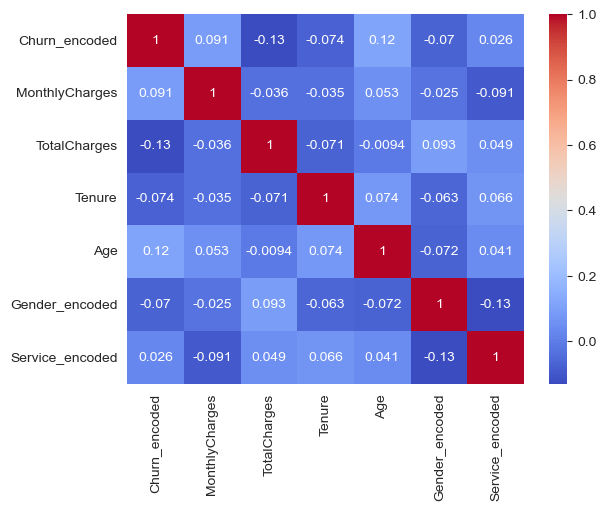

In [61]:
correlation_matrix = data[['Churn_encoded', 'MonthlyCharges', 'TotalCharges', 'Tenure', 'Age', 'Gender_encoded', 'Service_encoded']].corr()

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Corr Plots

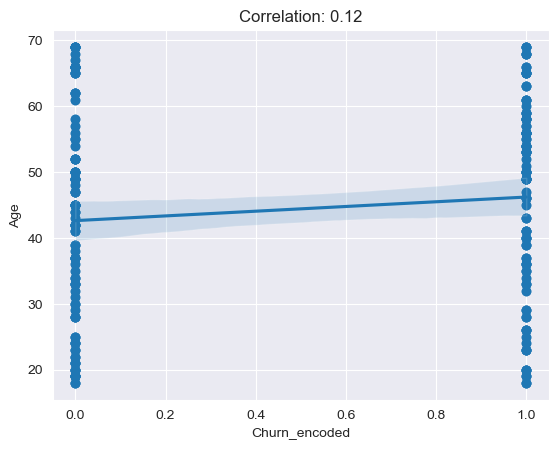

In [63]:
correlation = data['Churn_encoded'].corr(data['Age'])
plt.scatter(data['Churn_encoded'], data['Age'])
plt.xlabel('Churn_encoded')
plt.ylabel('Age')
sns.regplot(x='Churn_encoded', y='Age', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

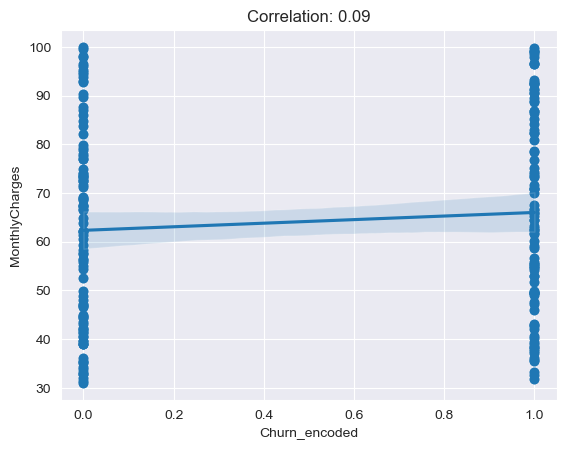

In [64]:
correlation = data['Churn_encoded'].corr(data['MonthlyCharges'])
plt.scatter(data['Churn_encoded'], data['MonthlyCharges'])
plt.xlabel('Churn_encoded')
plt.ylabel('MonthlyCharges')
sns.regplot(x='Churn_encoded', y='MonthlyCharges', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

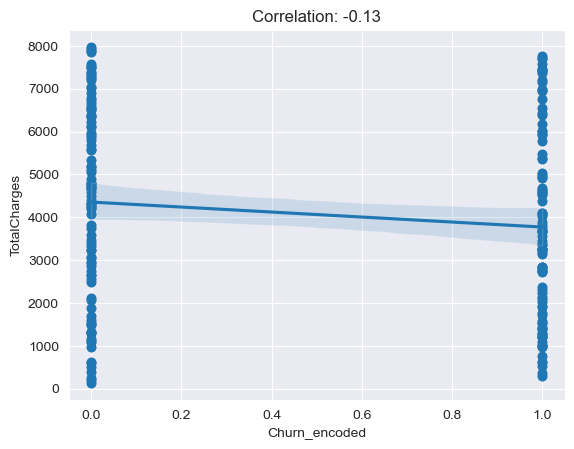

In [65]:
correlation = data['Churn_encoded'].corr(data['TotalCharges'])
plt.scatter(data['Churn_encoded'], data['TotalCharges'])
plt.xlabel('Churn_encoded')
plt.ylabel('TotalCharges')
sns.regplot(x='Churn_encoded', y='TotalCharges', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

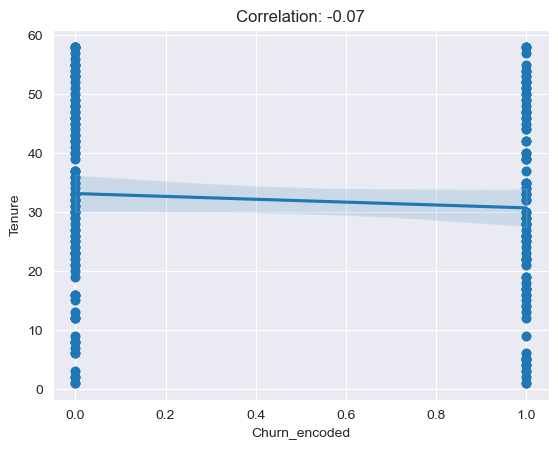

In [66]:
correlation = data['Churn_encoded'].corr(data['Tenure'])
plt.scatter(data['Churn_encoded'], data['Tenure'])
plt.xlabel('Churn_encoded')
plt.ylabel('Tenure')
sns.regplot(x='Churn_encoded', y='Tenure', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

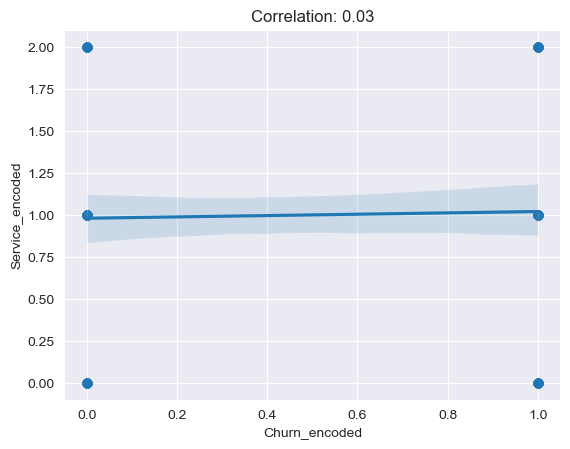

In [67]:
correlation = data['Churn_encoded'].corr(data['Service_encoded'])
plt.scatter(data['Churn_encoded'], data['Service_encoded'])
plt.xlabel('Churn_encoded')
plt.ylabel('Service_encoded')
sns.regplot(x='Churn_encoded', y='Service_encoded', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

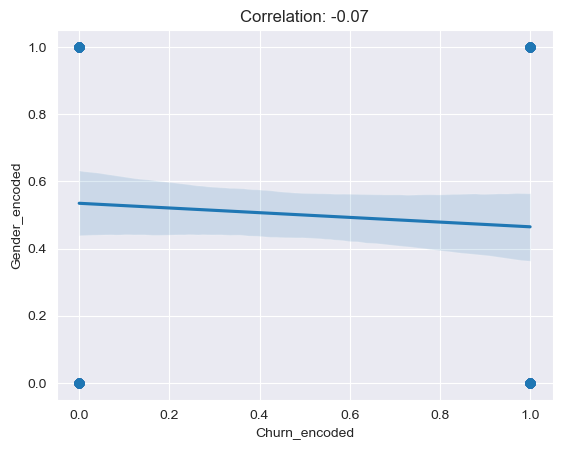

In [68]:
correlation = data['Churn_encoded'].corr(data['Gender_encoded'])
plt.scatter(data['Churn_encoded'], data['Gender_encoded'])
plt.xlabel('Churn_encoded')
plt.ylabel('Gender_encoded')
sns.regplot(x='Churn_encoded', y='Gender_encoded', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

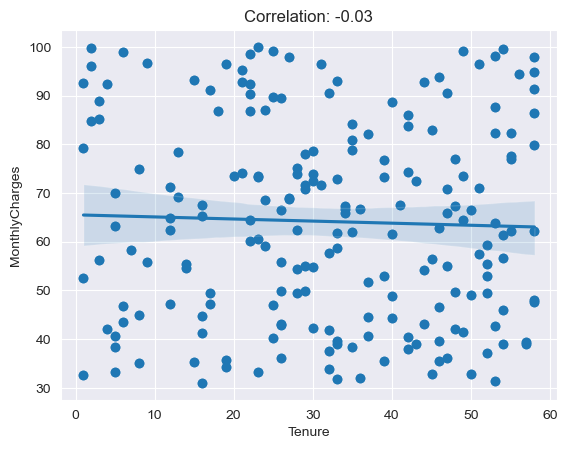

In [69]:
correlation = data['Tenure'].corr(data['MonthlyCharges'])
plt.scatter(data['Tenure'], data['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
sns.regplot(x='Tenure', y='MonthlyCharges', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

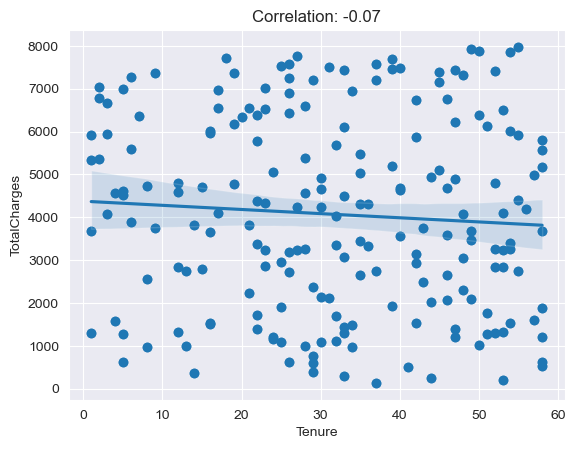

In [70]:
correlation = data['Tenure'].corr(data['TotalCharges'])
plt.scatter(data['Tenure'], data['TotalCharges'])
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
sns.regplot(x='Tenure', y='TotalCharges', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

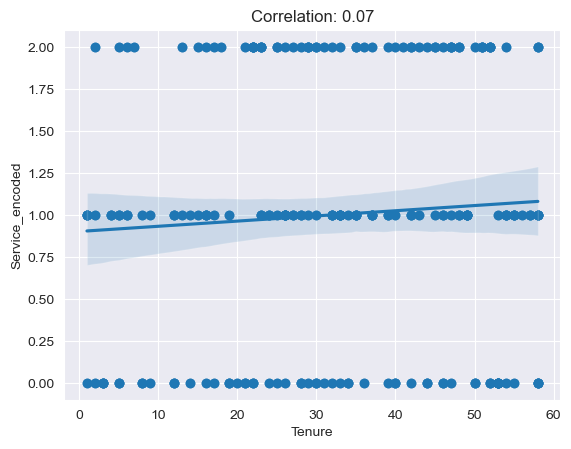

In [71]:
correlation = data['Tenure'].corr(data['Service_encoded'])
plt.scatter(data['Tenure'], data['Service_encoded'])
plt.xlabel('Tenure')
plt.ylabel('Service_encoded')
sns.regplot(x='Tenure', y='Service_encoded', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

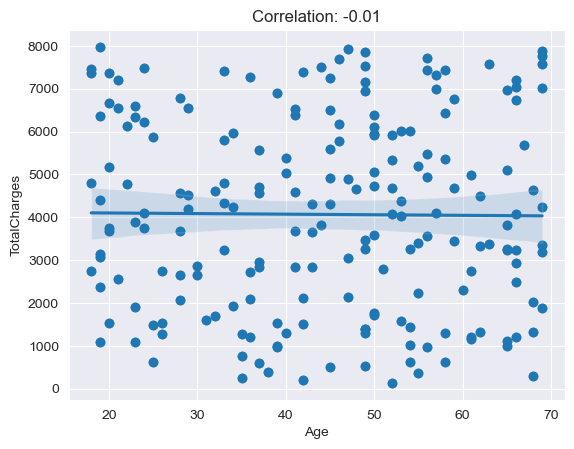

In [72]:
correlation = data['Age'].corr(data['TotalCharges'])
plt.scatter(data['Age'], data['TotalCharges'])
plt.xlabel('Age')
plt.ylabel('TotalCharges')
sns.regplot(x='Age', y='TotalCharges', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

## Analysis & Recomendations

### Analysis

The Histogram of the numerical columns of the Churn dataset shows that the data values have a widely spread distribution with almost no skew when considering the four numerical columns.

The Swarm plot comparing years of tenure to churn status was interesting because it showed each block of customers by years of tenure and by what service they subscruibed to. This was particularly interesting because it showed that regardless of type of service and years of tenure it didn't effect peoples choice on type of service they chose to have.

The box plot showed that those you chose the phone and internet pla on average had a higher total charge compared to just having phone or interenet service, but those who only chose internet service had a wider spread overall.

The histogram organized by years of tenure showed the count of each individual customer and how many years they had been with the company. Interestingly there are a couple of gap years with no customers holding tenure, specifically years of tenure at 27 and 32 had no customers indacting that no new customers joined the company back that many years ago.

The density plots are most interesting because between the two groups of Churn and non-churn customers over the three metrics messured there was little similarity from one chart to the next. The tenure density curves matched the closest showing that tenure compared to churn was fairly similar from both Yes and No Churn status. The total charges density curve showed interesting results that those with a churn status of yes were less likely to pay higher prices in total.

I messed around with the predictive modeling and tested a logistic regression model with tenure vs the other catagories and found that the accuracy was only 10% accurate when predicting the tenure based on the other columns of the data set. Additionally this model had a variance (MSE) of 16.65 which indicated that it had quite a large spread to it's predicted answers.

My next couple models were more focused and aimed to predict the Churn status of an individual customer based off the four numerical columns of interest (MonthlyCharges, TotalCharges, Tenure, and Age). 

First I used a decision tree model and got back an accuracy that ranges each time I run my code from 42.5% to 47.5% which showed that based on the four numerical columns values there is a 42.5% to 47.5% chance to predict the proper churn status of a customer.

My second model checked for accuracy with a logistic regression and produced a accuracy of 55% to predict customer churn status.

My third model only compared gender to churn status and found that the chance that gender could indicate churn status had a 49.5% chance to be correct.

I believe my most useful vizulization is my correlation matrix. It clearly shows that there is very little correlation between any of the columns of data. The Age of a customer has the highest correllation with Churn status and even that value is only 0.12 which indicates a very week correllation. The second Highest correlation is between monthly charges and churn at 0.091.

Because there is very little correlation between any of the categories and Churn rate and there is also very little correlation between tenure and monthly and total charages the company should look elsewhere for actionable insights.

### Recomendations

I would recomend to the company based on the analysis and finding above the following:

1. Advertisement for services should be focused on increasing the internet and phone + internet customer base as these two categories are trailling behind the phone only customers.
2. To reduce churn rates the company might want to consider a loyalty program that scales with tenure, and also insentive programs for new customers.
3. Given that no two catagories have a significant correlation, churn rates could be due to customers movine out of service range. My suggestion would be to increase the scope of coverage to prevent the loss of customers moving outside of the current coverage zone.